In [1]:
import scanpy as sc
import numpy as np
import scgen as scg
import pandas as pd
import sys
sys.path.append("/work/users/username/projects/cov/integration/analysis")
import helper_VAE as hVAE
import scipy.sparse
import scgen
import matplotlib.pyplot as plt
import seaborn as sns
import harmonypy as hpy
import anndata
import random
import os

base_ma = "/work/users/username/projects/cov/integration/run_proof_principle_228_1/backup/ma/" 
species = 'ma'
object_number = '228_1'
script_number = 'B02'
celltypes = ['Neutrophils']
for celltype in celltypes:
    model_save_string = base_ma + celltype + '/228_1_B01_' + celltype + '_model.pt' 
    model = scgen.SCGEN.load(model_save_string)

    adata = model.adata
    lat_adata = hVAE.get_latent_representation_object(model,adata)


    hVAE.prepare_umap(lat_adata)

    lat_adata_hamster = lat_adata[lat_adata.obs['dataset'] == 'hamsterMA']
    lat_adata_human = lat_adata[lat_adata.obs['dataset'] == 'human']
    delta = hVAE.get_delta_in_latent_space(lat_adata_hamster,lat_adata_human)

    delta

    lat_adata_hamster_shifted = hVAE.shift_adata_in_latent_space(lat_adata_hamster,delta)

    lat_adata_hamster_shifted.obs['dataset'] = 'humanized hamsterMA'

    lat_train_shifted = hVAE.merge_adata(lat_adata,lat_adata_hamster_shifted)

    hVAE.prepare_umap(lat_train_shifted)

    color_palette = ['#AED6F1','#FFA5B1','#3498DB']
    point_size = np.ones(len(lat_train_shifted))

/home/sc.uni-leipzig.de/username/miniconda3/envs/scgen/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 21393 cells, 2796 vars, 2 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


2023-07-17 09:43:46.352301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-17 09:43:46.352341: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/sc.uni-leipzig.de/username/miniconda3/envs/scgen/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [2]:
test_adata = sc.read_h5ad(celltype + '/controls_test_pp_228_1_B01_' + celltype +'.h5ad')

lat_test_adata = hVAE.get_latent_representation_object(model,test_adata)

lat_hamster_test = lat_test_adata[lat_test_adata.obs['dataset'] == 'hamsterMA']

lat_hamster_test_shifted = hVAE.shift_adata_in_latent_space(lat_hamster_test,delta)

lat_hamster_test_shifted.obs['dataset'] = 'humanized hamster'

lat_test_predicted = hVAE.merge_adata(lat_test_adata,lat_hamster_test_shifted)


lat_test_predicted = hVAE.merge_adata(lat_test_adata,lat_hamster_test_shifted)

hVAE.prepare_umap(lat_test_predicted)

INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 2799 cells, 2796 vars, 2 batches, 
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/home/sc.uni-leipzig.de/username/miniconda3/envs/scgen/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/home/sc.uni-leipzig.de/username/miniconda3/envs/scgen/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


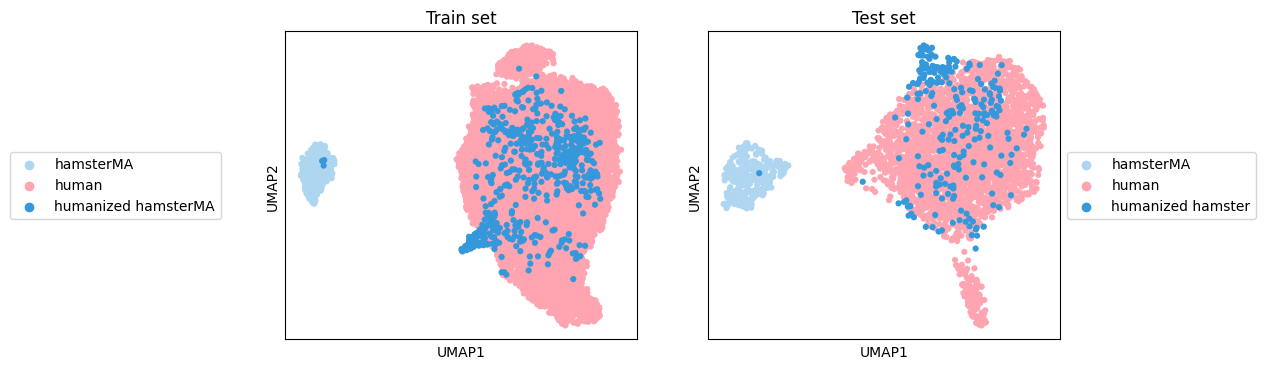

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


# Plot UMAP for AnnData 2
color_palette = ['#AED6F1','#FFA5B1','#3498DB']
point_size = np.ones(len(lat_train_shifted))
sc.pl.umap(lat_train_shifted, ax=axes[0],show = False,color = 'dataset',palette = color_palette,size = point_size*80)
axes[0].set_title('Train set')
axes[0].legend(loc='center left', bbox_to_anchor=(-0.8, 0.5))
axes[0].invert_xaxis()

color_palette = ['#AED6F1','#FFA5B1','#3498DB']
point_size = np.ones(len(lat_test_predicted))
sc.pl.umap(lat_test_predicted, ax=axes[1],show = False,color = 'dataset',palette = color_palette,size = point_size*80)
axes[1].set_title('Test set')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(celltype + '/umap_train_test_B04_228_1_' + celltype + '.pdf',bbox_inches = 'tight')

/home/sc.uni-leipzig.de/username/miniconda3/envs/scgen/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/sc.uni-leipzig.de/username/miniconda3/envs/scgen/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/sc.uni-leipzig.de/username/miniconda3/envs/scgen/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


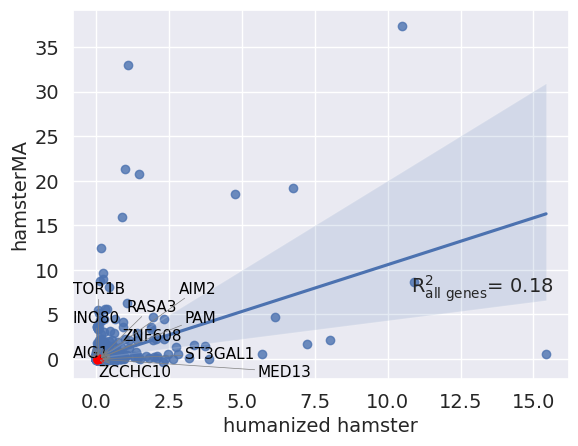

In [8]:
decoded_test = hVAE.decode_latent_object(model,lat_test_predicted,test_adata)

# reg mean analysis

sc.tl.rank_genes_groups(decoded_test, groupby="dataset", method="wilcoxon")
diff_genes = decoded_test.uns["rank_genes_groups"]["names"]["humanized hamster"]

r2_value_hamster_hamster_humanized = model.reg_mean_plot(
    decoded_test,
    axis_keys={"x": "humanized hamster", "y": "hamsterMA"},
    gene_list=diff_genes[:10],
    labels={"x": "humanized hamster", "y": "hamsterMA"},
    show = True,
    legend=False,
    path_to_save = celltype + '/reg_mean_228_1_B04_hamster_hamster_humanized.pdf'
)





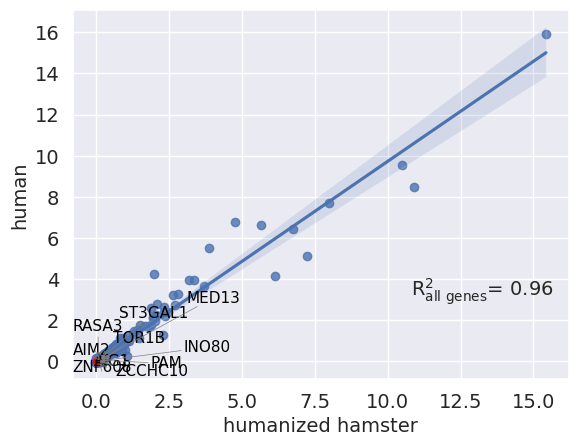

In [9]:
r2_value_human_hamster_humanized = model.reg_mean_plot(
    decoded_test,
    axis_keys={"x": "humanized hamster", "y": "human"},
    gene_list=diff_genes[:10],
    labels={"x": "humanized hamster", "y": "human"},
    show = True,
    legend=False,
    path_to_save = celltype + '/reg_mean_228_1_B04_human_hamster_humanized.pdf'
    )



In [10]:
r2_overview = pd.DataFrame([r2_value_hamster_hamster_humanized,r2_value_human_hamster_humanized],
             columns = [celltype],index = ['hamster hamster humanized','human hamster humanized'])


In [11]:
r2_overview

,Neutrophils
hamster hamster humanized,0.184684
human hamster humanized,0.961511
